In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Generando las variables
x_temperature = np.arange(0,200,1)
x_areaFire = np.arange(0,20,0.5)
x_alert = np.arange(0,1,0.1)

## Fuzzy member ship
temp_low = fuzz.trapmf(x_temperature, [0, 0,40, 80])
temp_medium = fuzz.trimf(x_temperature, [40, 80, 120])
temp_high = fuzz.trapmf(x_temperature,[80,120,200,200])

areaF_low = fuzz.trapmf(x_areaFire, [0, 0, 0.5, 1])
areaF_medium = fuzz.trimf(x_areaFire, [0.5, 1, 2])
areaF_high = fuzz.trapmf(x_areaFire, [1, 2, 20,20])

alert_low = fuzz.trapmf(x_alert, [0,0, 0.3 ,0.5])
alert_medium = fuzz.trimf(x_alert, [0.3, 0.5 , 0.7])
alert_high = fuzz.trapmf(x_alert, [0.5,0.7, 1.0,1.0])


## Visualize memberships

fig, (ax0, ax1, ax2) = plt.subplots(nrows= 3, figsize = (8,9))

ax0.plot(x_temperature, temp_low, 'b', linewidth = 1.5, label = 'Baja')
ax0.plot(x_temperature, temp_medium, 'g', linewidth = 1.5, label = 'Media')
ax0.plot(x_temperature, temp_high, 'r', linewidth = 1.5, label = 'Alta')
ax0.set_title('Temperatura')
ax0.legend()

ax1.plot(x_areaFire, areaF_low, 'b', linewidth = 1.5, label = 'Pequena')
ax1.plot(x_areaFire, areaF_medium, 'g', linewidth = 1.5, label = 'Mediana')
ax1.plot(x_areaFire, areaF_high, 'r', linewidth = 1.5, label = 'Grande')
ax1.set_title('Area Fuego')
ax1.legend()

ax2.plot(x_alert, alert_low, 'b', linewidth = 1.5, label = 'Verde')
ax2.plot(x_alert, alert_medium, 'g', linewidth = 1.5, label = 'Amarillo')
ax2.plot(x_alert, alert_high, 'r', linewidth = 1.5, label = 'Rojo')
ax2.set_title('Alerta')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

plt.savefig("memberships.png")
## Fuzzy Rules
## 1. Si la temperatura es baja or el area es baja, entonces la alerta es baja




: 

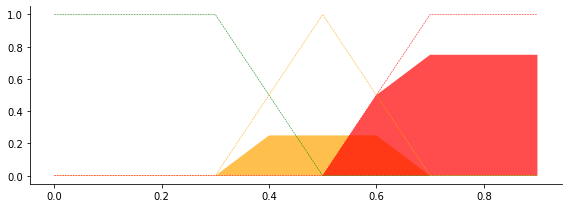

In [32]:
## Define Rules
## 1. Si Temperatura es baja es verde
## 2. Si Tmperatura es media y area es baja entonces es verde
## 3. Si temperatura es media y area es media estonces es naranaja
## 4. Si tempertatua es madia y area es grande naranja
## 5. Si temperatura es alta y area es pequena entonces es naranja
## 6. Si temperatura es alta y area es media entonces en rojo
## 7. Si tempertatua es alta y area es alta entonces es rojo


temperature = 110
areaFile = 2

temp_level_low = fuzz.interp_membership(x_temperature, temp_low, temperature) 
temp_level_medium = fuzz.interp_membership(x_temperature, temp_medium, temperature) 
temp_level_high = fuzz.interp_membership(x_temperature, temp_high, temperature) 

areaF_level_low = fuzz.interp_membership(x_areaFire, areaF_low, areaFile) 
areaF_level_medium = fuzz.interp_membership(x_areaFire, areaF_medium, areaFile) 
areaF_level_high = fuzz.interp_membership(x_areaFire, areaF_high, areaFile) 

## Primera regla
## Verde

rule1_1 = np.fmin(temp_level_low, areaF_level_low)
rule1_2 = np.fmin(temp_level_low, areaF_level_medium)
rule1_3 = np.fmin(temp_level_low, areaF_level_high)
rule1_4 = np.fmin(temp_level_medium, areaF_level_low)
rule1_5 = np.fmax(rule1_1, rule1_2)
rule1_6 = np.fmax(rule1_1, rule1_2)

rule_verde = np.fmax(rule1_5, rule1_6)

## naranja

rule2_1 = np.fmin(temp_level_medium, areaF_level_medium)
rule2_2 = np.fmin(temp_level_medium, areaF_level_high)
rule2_3 = np.fmin(temp_level_high, areaF_level_low)
rule2_4 =  np.fmax(rule2_1, rule2_2)
rule_naranja =  np.fmax(rule2_4, rule2_3)

## naranja
rule3_1 = np.fmin(temp_level_high, areaF_level_medium)
rule3_2 = np.fmin(temp_level_high, areaF_level_high)
rule_rojo = np.fmax(rule3_1,rule3_2)

verde = np.fmin(rule_verde, alert_low)

naranja = np.fmin(rule_naranja, alert_medium)
rojo = np.fmin(rule_rojo, alert_high)


alert0 = np.zeros_like(x_alert)

## Visualize 

fig, ax0 = plt.subplots(figsize = (8,3))

ax0.fill_between(x_alert, alert0, verde, facecolor = 'g', alpha = 0.7)
ax0.plot(x_alert, alert_low, 'g', linewidth = 0.5, linestyle = '--')

ax0.fill_between(x_alert, alert0, naranja, facecolor = 'orange', alpha = 0.7)
ax0.plot(x_alert, alert_medium, 'orange', linewidth = 0.5, linestyle = '--')

ax0.fill_between(x_alert, alert0, rojo, facecolor = 'r', alpha = 0.7)
ax0.plot(x_alert, alert_high, 'r', linewidth = 0.5, linestyle = '--')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [33]:
rule_verde, rule_naranja, rule_rojo

(0.0, 0.25, 0.75)

(array([0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.77555756e-16,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0.5]))

Alerta:  0.5333333333333333


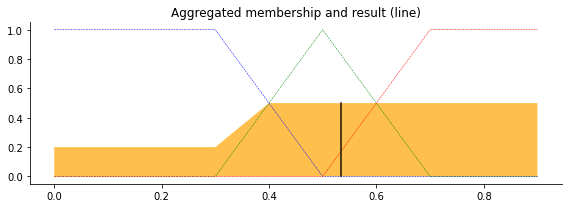

In [11]:
## Desfuzificacion
aggregated = np.fmax(verde, np.fmax(naranja, rojo))

# Calculate defuzzified result
alert = fuzz.defuzz(x_alert, aggregated, 'centroid')
print("Alerta: ", alert)
alert_activation = fuzz.interp_membership(x_alert, aggregated, alert)  # for plot
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_alert, alert_low, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_alert, alert_medium, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_alert, alert_high, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_alert, alert0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([alert, alert], [0, alert_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
                     